In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
pathIn = 'trial_data/'
pathOut = 'trial_output/'

In [8]:
lr_image = cv2.imread(pathIn+'noisy.jpg')
lr_image =cv2.cvtColor(lr_image, cv2.COLOR_BGR2GRAY)
dim=(lr_image.shape[0],lr_image.shape[1],2)
buffer = np.zeros(dim, dtype=np.uint8)

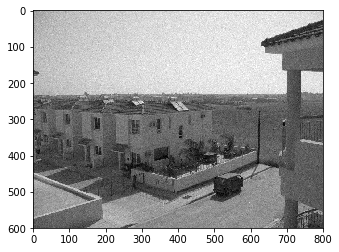

In [9]:
buffer[:,:,0]=lr_image
s = 1
d = 0
weight_diff = 0.02
iterations = 10
max_diff = 200
covar = 100
v_max = (lr_image.shape[0]*lr_image.shape[1])* \
((256*256)/(2*covar+4*weight_diff*max_diff))
plt.figure()
plt.imshow(lr_image,cmap='gray')
plt.show()

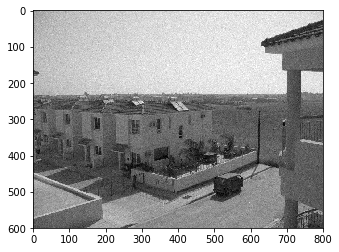

iteration 0


In [ ]:
plt.figure()
plt.imshow(lr_image,cmap='gray')
plt.show()
plt.figure()
for i in range(iterations):
    print('iteration '+ str(i))
    if s==0:
        s=1
        d=0
    else: 
        s=0
        d=1
    for r in range(lr_image.shape[0]):
        for c in range(lr_image.shape[1]):
            v_local= v_max
            min_val = -1
            for val in range(255):
                v_data = (val-lr_image[r,c])**2/(2*covar)
                v_diff=0
                if r>1:
                    v_diff = v_diff + \
                    min((val-buffer[r-1,c,s])**2,max_diff)
                v_current=v_data+weight_diff*v_diff
                if v_current < v_local:
                    min_val=val
                    v_local=v_current
                #print('iteration '+str(i)+' row '+str(r)+' column '+str(c)+' colour '+str(val))
            buffer[r,c,d]=min_val
            
            plt.imshow(buffer[:,:,d],cmap='gray')
        sr_image=buffer[:,:,d]
        plt.imshow(sr_image,cmap='gray')
sr_image=buffer[:,:,d]
        
